In [ ]:
from pathlib import Path

# 1. Trouve dynamiquement la racine du projet (contenant .gitignore)
cwd = Path.cwd()
PROJECT_ROOT = next(p for p in (cwd, *cwd.parents) if (p / ".gitignore").exists())

print("PROJECT_ROOT =", PROJECT_ROOT)

PROJECT_ROOT = /Users/mackjb/repository/datasciencetest_reco_plante


In [22]:
from pathlib import Path
import pandas as pd
import plotly.express as px
import os
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [23]:

# Chemin vers le dossier principal PlantVillage
root_dir = PROJECT_ROOT / "dataset" / "plantvillage" / "data" / "plantvillage dataset" / "segmented"

data = []

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(subdir, file)
            rel_path = os.path.relpath(filepath, root_dir)
            parts = rel_path.split(os.sep)

            # Cas 1 : PlantVillage/Strawberry___healthy/image.jpg
            if len(parts) >= 2 and "___" in parts[0]:
                # format: class___disease/filename
                class_disease = parts[0]
                plant_class, disease = class_disease.split('___', 1)
            # Cas 2 : PlantVillage/Strawberry/healthy/image.jpg
            elif len(parts) >= 3:
                plant_class, disease = parts[0], parts[1]
            # Cas fallback
            else:
                plant_class, disease = parts[0], None

            ext = os.path.splitext(file)[-1].lower().replace('.', '')

            try:
                with Image.open(filepath) as img:
                    width, height = img.size
                    # Optionnel : is_centered (pas modifié ici)
            except Exception as e:
                width, height = None, None

            data.append({
                "filepath": filepath,
                "filename": file,
                "class": plant_class,
                "disease": disease,
                "extension": ext,
                "width": width,
                "height": height,
                # "is_centered": None  # À calculer ensuite si besoin
            })

df = pd.DataFrame(data)
df.head()

,filepath,filename,class,disease,extension,width,height
0,/Users/mackjb/repository/datasciencetest_reco_...,091b0459-1a9a-4a60-b59f-3de2faedb6f8___RS_HL 2...,Strawberry,healthy,jpg,256,256
1,/Users/mackjb/repository/datasciencetest_reco_...,aba13626-8beb-474e-b609-300e7eb4e896___RS_HL 1...,Strawberry,healthy,jpg,256,256
2,/Users/mackjb/repository/datasciencetest_reco_...,ec906a90-7da2-420f-a3ab-5a67979868ee___RS_HL 2...,Strawberry,healthy,jpg,256,256
3,/Users/mackjb/repository/datasciencetest_reco_...,04cb725a-632d-44e0-9886-c84e2bbdd3da___RS_HL 2...,Strawberry,healthy,jpg,256,256
4,/Users/mackjb/repository/datasciencetest_reco_...,7e02bc12-a026-4aff-88b1-78dcd0a97fa1___RS_HL 1...,Strawberry,healthy,jpg,256,256


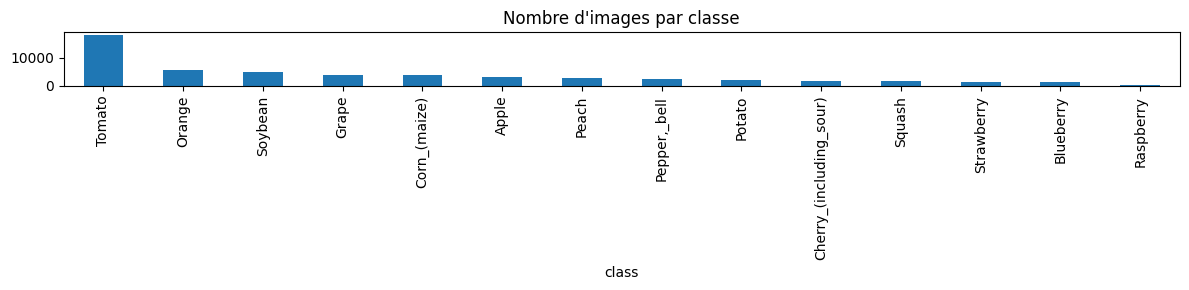

In [24]:
df.groupby("class")["filename"].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,3), title="Nombre d'images par classe")
plt.tight_layout()
plt.show()

/var/folders/3c/g0xfydzx0ql5lty6fzv7sbqc0000gn/T/ipykernel_82368/1391405169.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


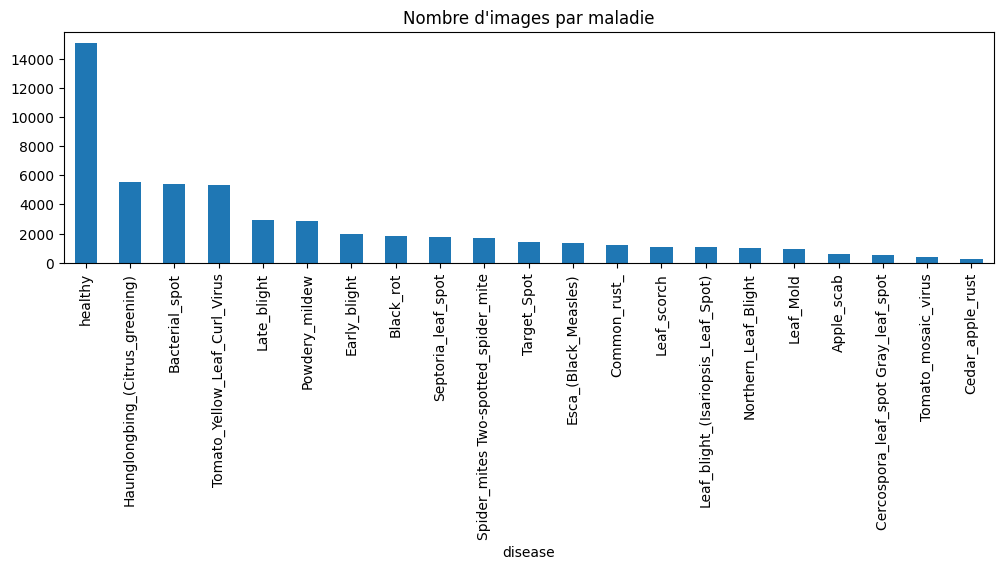

In [25]:
df.groupby("disease")["filename"].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,3), title="Nombre d'images par maladie")
plt.tight_layout()
plt.show()

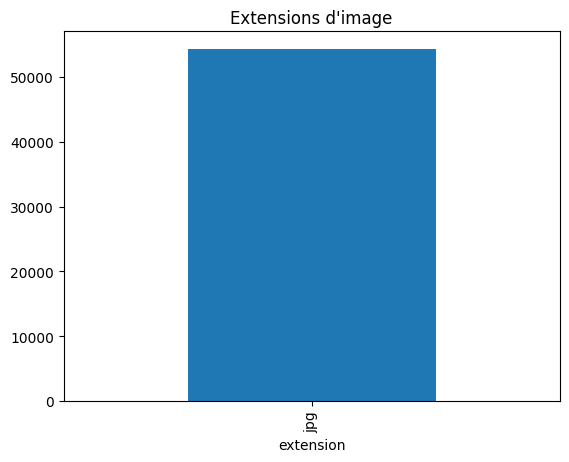

In [26]:
df["extension"].value_counts().plot(kind='bar', title="Extensions d'image")
plt.show()

<Axes: title={'center': 'Résolution des images'}, xlabel='width,height'>

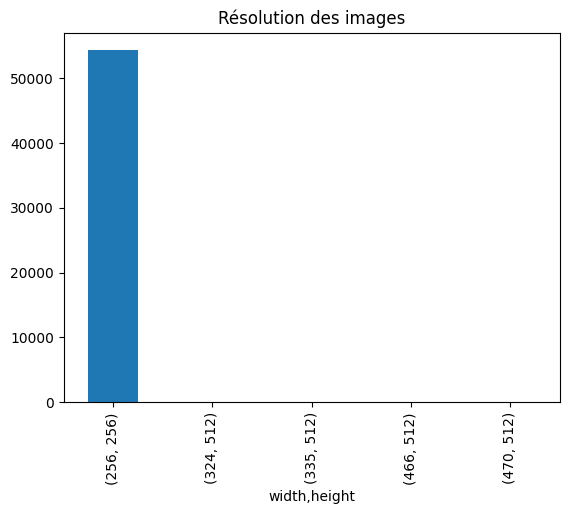

In [29]:
df[["width", "height"]].value_counts().plot(kind='bar', title="Résolution des images")